In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import shared

ve_or_ju = "ve"
year = 2019

In [2]:
estimates = pd.read_json(f'web-lib/for_web_{ve_or_ju}_{year}.json', orient="records", convert_dates=["fin_time_median", "fin_time_start95", "fin_time_end95"])



In [3]:
estimates.head()

,team_id,leg,team,name,num_runs,ind_log_mean,ind_log_std,personal_start95,personal_median,personal_end95,fin_sum_log_mean,fin_sum_log_std,fin_time_start95,fin_time_end95,fin_time_median,mass_start,dark_during_leg
0,1,1,Stora Tuna OK 1,Tilda Östberg,1,1.8857,0.116689,31.362034,39.411989,49.818220,3.675452,0.118180,2019-06-15 11:31:21.722000+00:00,2019-06-15 11:49:49.093000+00:00,2019-06-15 11:39:24.719000+00:00,0.0,0
1,1,2,Stora Tuna OK 1,Magdalena Olsson,7,1.9587,0.082400,34.335339,40.474712,47.549226,4.383499,0.072250,2019-06-15 12:09:46.385000+00:00,2019-06-15 12:32:54.037000+00:00,2019-06-15 12:20:05.037000+00:00,0.0,0
2,1,3,Stora Tuna OK 1,Julia Jakob,1,1.7824,0.141808,32.740572,43.408851,56.843543,4.819016,0.068305,2019-06-15 12:48:29.148000+00:00,2019-06-15 13:21:46.579000+00:00,2019-06-15 13:03:46.609000+00:00,0.0,0
3,1,4,Stora Tuna OK 1,Tove Alexandersson,7,1.7963,0.067659,41.667187,47.623576,54.381271,5.145210,0.052867,2019-06-15 13:34:56.570000+00:00,2019-06-15 14:10:48.052000+00:00,2019-06-15 13:51:31.587000+00:00,0.0,0
4,2,1,Göteborg Majorna OK 1,Amanda Hansson,2,2.0053,0.086131,37.518297,44.572995,52.816954,3.796858,0.086747,2019-06-15 11:37:31.097000+00:00,2019-06-15 11:52:49.017000+00:00,2019-06-15 11:44:34.379000+00:00,0.0,0


In [4]:
display(estimates.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 17 columns):
team_id             6728 non-null int64
leg                 6728 non-null int64
team                6728 non-null object
name                6728 non-null object
num_runs            6728 non-null int64
ind_log_mean        6728 non-null float64
ind_log_std         6728 non-null float64
personal_start95    6728 non-null float64
personal_median     6728 non-null float64
personal_end95      6728 non-null float64
fin_sum_log_mean    6728 non-null float64
fin_sum_log_std     6728 non-null float64
fin_time_start95    6728 non-null datetime64[ns, UTC]
fin_time_end95      6728 non-null datetime64[ns, UTC]
fin_time_median     6728 non-null datetime64[ns, UTC]
mass_start          6728 non-null float64
dark_during_leg     6728 non-null int64
dtypes: datetime64[ns, UTC](3), float64(8), int64(4), object(2)
memory usage: 893.7+ KB


None

In [5]:
# Read the actual times after race and analyze estimates

results = pd.read_csv(f'data/results_with_dist_j{year}_{ve_or_ju}.tsv', delimiter="\t")
display(results.head().round(2))
results = results[["team-id", "leg-nro", "leg-time", "leg_distance"]]
results["leg-time"] = results["leg-time"] / 60
results = results.rename(index=str, columns={"team-id": "team_id", "leg-nro": "leg"})
results.head()

,team-id,placement,team-time,team-name,team-nro,leg-nro,emit,leg-time,competitor-name,weighted_log_mean_pace,weighted_log_pace_std,disqualified,leg_distance
0,22,1.0,9917.0,Fredrikstad SK,1,1,1237786.0,2325.0,Marianne Riddervold Kahrs,1.85,0.25,False,6.0
1,22,1.0,9917.0,Fredrikstad SK,1,2,1509400.0,2136.0,Marie Olaussen,1.83,0.25,False,5.7
2,22,1.0,9917.0,Fredrikstad SK,1,3,1509422.0,2595.0,Marianne Andersen,1.77,0.19,False,7.3
3,22,1.0,9917.0,Fredrikstad SK,1,4,1509399.0,2860.0,Kamilla Olaussen,1.78,0.22,False,7.9
4,19,2.0,10138.0,IFK Göteborg,1,1,1217441.0,2314.0,Miri Thrane Ödum,1.83,0.26,False,6.0


,team_id,leg,leg-time,leg_distance
0,22,1,38.750000,6.0
1,22,2,35.600000,5.7
2,22,3,43.250000,7.3
3,22,4,47.666667,7.9
4,19,1,38.566667,6.0


In [6]:

with_result = pd.merge(estimates, results, how='left', on=['team_id', 'leg'])
with_result = with_result[np.isfinite(with_result["leg-time"])]

In [7]:
with_result.head()


,team_id,leg,team,name,num_runs,ind_log_mean,ind_log_std,personal_start95,personal_median,personal_end95,fin_sum_log_mean,fin_sum_log_std,fin_time_start95,fin_time_end95,fin_time_median,mass_start,dark_during_leg,leg-time,leg_distance
0,1,1,Stora Tuna OK 1,Tilda Östberg,1,1.8857,0.116689,31.362034,39.411989,49.818220,3.675452,0.118180,2019-06-15 11:31:21.722000+00:00,2019-06-15 11:49:49.093000+00:00,2019-06-15 11:39:24.719000+00:00,0.0,0,47.416667,6.0
1,1,2,Stora Tuna OK 1,Magdalena Olsson,7,1.9587,0.082400,34.335339,40.474712,47.549226,4.383499,0.072250,2019-06-15 12:09:46.385000+00:00,2019-06-15 12:32:54.037000+00:00,2019-06-15 12:20:05.037000+00:00,0.0,0,37.050000,5.7
2,1,3,Stora Tuna OK 1,Julia Jakob,1,1.7824,0.141808,32.740572,43.408851,56.843543,4.819016,0.068305,2019-06-15 12:48:29.148000+00:00,2019-06-15 13:21:46.579000+00:00,2019-06-15 13:03:46.609000+00:00,0.0,0,44.116667,7.3
3,1,4,Stora Tuna OK 1,Tove Alexandersson,7,1.7963,0.067659,41.667187,47.623576,54.381271,5.145210,0.052867,2019-06-15 13:34:56.570000+00:00,2019-06-15 14:10:48.052000+00:00,2019-06-15 13:51:31.587000+00:00,0.0,0,46.200000,7.9
4,2,1,Göteborg Majorna OK 1,Amanda Hansson,2,2.0053,0.086131,37.518297,44.572995,52.816954,3.796858,0.086747,2019-06-15 11:37:31.097000+00:00,2019-06-15 11:52:49.017000+00:00,2019-06-15 11:44:34.379000+00:00,0.0,0,40.483333,6.0


In [8]:
with_result["ind_leg_time_estimate"] = np.exp(with_result["ind_log_mean"]) * with_result["leg_distance"]

In [9]:
with_result["ind_error"] = np.abs(with_result["ind_leg_time_estimate"] - with_result["leg-time"])
with_result["ind_error_ratio"] = with_result["ind_error"] / with_result["leg-time"]
with_result["ind_interval_error"] = (with_result["personal_start95"] > with_result["leg-time"]) | (with_result["personal_end95"] < with_result["leg-time"])


In [10]:
with_result.sort_values(by=['ind_error']).tail(10).round(2)

,team_id,leg,team,name,num_runs,ind_log_mean,ind_log_std,personal_start95,personal_median,personal_end95,...,fin_time_end95,fin_time_median,mass_start,dark_during_leg,leg-time,leg_distance,ind_leg_time_estimate,ind_error,ind_error_ratio,ind_interval_error
6535,1671,4,Team Persikka 1,Leena Kilpelä,0,2.71,0.18,82.57,118.15,170.10,...,2019-06-15 19:05:55.366000+00:00,2019-06-15 17:43:50.393000+00:00,0.68,0,201.98,7.9,118.50,83.48,0.41,True
6260,1602,1,Ota kiinni jos saat 1,Virpi Kokkonen,0,2.50,0.19,49.56,73.10,107.01,...,2019-06-15 12:47:00.678000+00:00,2019-06-15 12:13:05.784000+00:00,0.00,0,164.88,6.0,72.93,91.95,0.56,True
4211,1072,4,Rasti-Perniö 2,Lotta Tamminen,6,2.72,0.15,87.97,119.59,162.18,...,2019-06-15 18:02:53.413000+00:00,2019-06-15 17:00:47.043000+00:00,0.10,0,211.48,7.9,119.46,92.03,0.44,True
5292,1353,1,Riihimäen Suunnistajat 3,Marja-Liisa Liminka,0,2.51,0.18,52.04,74.33,106.10,...,2019-06-15 12:46:05.971000+00:00,2019-06-15 12:14:19.519000+00:00,0.00,0,167.20,6.0,74.15,93.05,0.56,True
5889,1507,2,Ukkoskyykky 1,Iines Piesala,0,2.71,0.22,56.52,85.67,129.89,...,2019-06-15 14:46:10.039000+00:00,2019-06-15 13:50:02.008000+00:00,0.00,0,183.43,5.7,85.50,97.93,0.53,True
5811,1486,4,Paha rasti - etsikää meidät ennen pimeää 2,Annika Mäki,0,2.51,0.19,66.33,96.86,141.10,...,2019-06-15 18:33:16.691000+00:00,2019-06-15 17:15:15.103000+00:00,0.59,0,195.40,7.9,96.94,98.46,0.50,True
6433,1646,2,Harharetki 1,Johanna Latikka,0,2.71,0.18,59.63,85.07,122.87,...,2019-06-15 14:47:03.130000+00:00,2019-06-15 13:55:28.939000+00:00,0.00,0,187.03,5.7,85.50,101.53,0.54,True
4774,1219,3,Hiukkasen Hukassa 1,Siiri Pietilä,1,2.51,0.25,54.85,90.21,146.96,...,2019-06-15 16:43:33.203000+00:00,2019-06-15 15:19:00.476000+00:00,0.00,0,193.93,7.3,90.15,103.78,0.54,True
5621,1438,2,Valiokerho Jyväskylä 1,Leena Vähä-Maahi,7,2.89,0.16,75.45,102.91,140.16,...,2019-06-15 14:48:50.235000+00:00,2019-06-15 14:09:03.541000+00:00,0.00,0,212.15,5.7,102.60,109.55,0.52,True
6158,1576,3,Basware 1,Kristiina Kuisma,0,2.38,0.20,54.04,79.08,115.73,...,2019-06-15 16:24:57.564000+00:00,2019-06-15 15:25:34.774000+00:00,0.00,0,205.63,7.3,79.25,126.38,0.61,True


In [11]:
display(f'Yksilöennusteen keskivirhe: {np.mean(with_result["ind_error"]).round(1)} minuuttia')  

'Yksilöennusteen keskivirhe: 9.4 minuuttia'

In [12]:
display(f'Yksilöennusteen mediaanivirhe: {np.median(with_result["ind_error"]).round(1)} minuuttia') 

'Yksilöennusteen mediaanivirhe: 6.4 minuuttia'

In [13]:
display(f'Yksilön aikaväliennuste väärin: {np.mean(with_result["ind_interval_error"]).round(3) * 100} %')  

'Yksilön aikaväliennuste väärin: 5.2 %'

In [14]:
with_result[["num_runs", 'ind_error', 'ind_interval_error']].groupby('num_runs').agg(["mean", "median", "count"]).round(2)

ind_error              ind_interval_error             
              mean median count               mean median count
num_runs                                                       
0            13.86  10.32  1592               0.07  False  1592
1            10.31   6.91   995               0.04  False   995
2             9.94   7.56   715               0.02  False   715
3             8.38   6.40   687               0.02  False   687
4             7.26   5.67   548               0.08  False   548
5             7.23   5.32   559               0.10  False   559
6             6.37   4.38   548               0.05  False   548
7             5.69   4.08   562               0.05  False   562
8             5.24   3.66   380               0.03  False   380
9             6.07   6.07     2               0.00  False     2
10            3.56   3.56     1               0.00  False     1

In [15]:
with_result[["leg", 'ind_error', 'ind_interval_error']].groupby('leg').agg(["mean", "median", "count"]).round(2)

ind_error              ind_interval_error             
         mean median count               mean median count
leg                                                       
1        8.08   5.82  1673               0.06  False  1673
2        8.66   5.68  1654               0.06  False  1654
3       10.57   7.12  1641               0.05  False  1641
4       10.31   7.39  1621               0.04  False  1621

In [16]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// # To disable auto-scrolling, execute this javascript in a notebook cell before other cells are executed:

<IPython.core.display.Javascript object>

(0, 100)

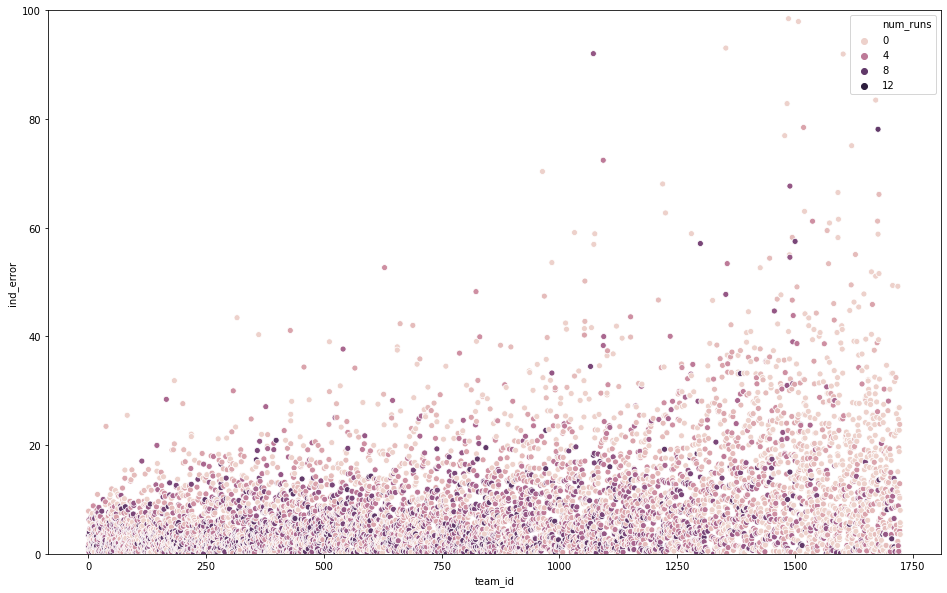

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="ind_error", hue="num_runs", data=with_result)
plot.axes.set_ylim(0, 100)


(30, 150)

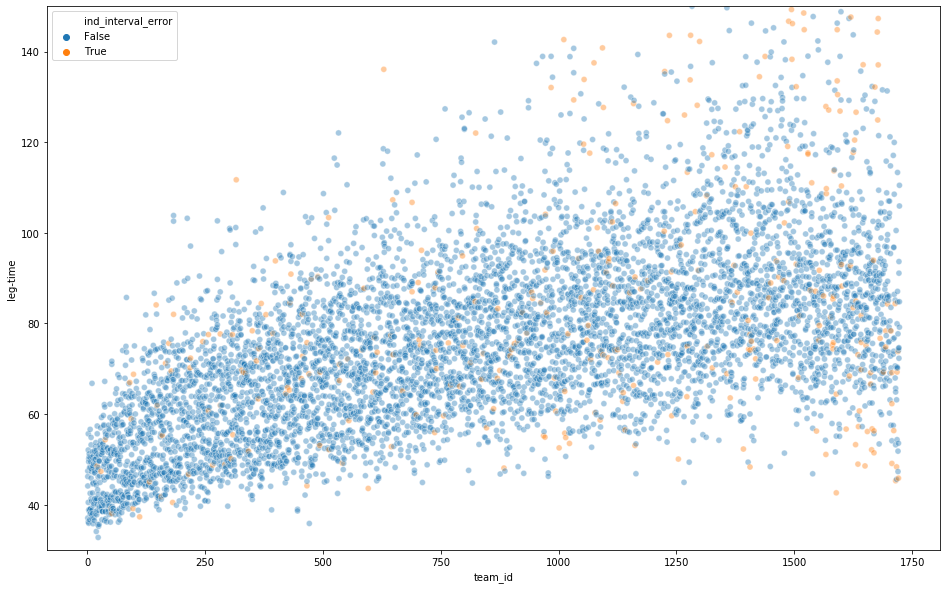

In [18]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="leg-time", hue="ind_interval_error", alpha=0.4, data=with_result)
plot.axes.set_ylim(30, 150)

(30, 150)

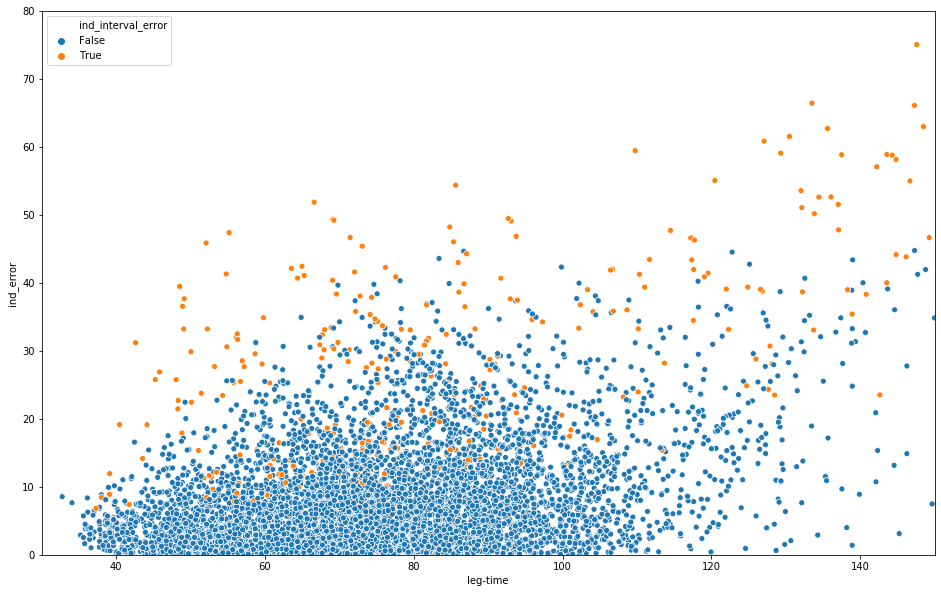

In [19]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="leg-time", y="ind_error", hue="ind_interval_error", data=with_result)
plot.axes.set_ylim(0, 80)
plot.axes.set_xlim(30, 150)

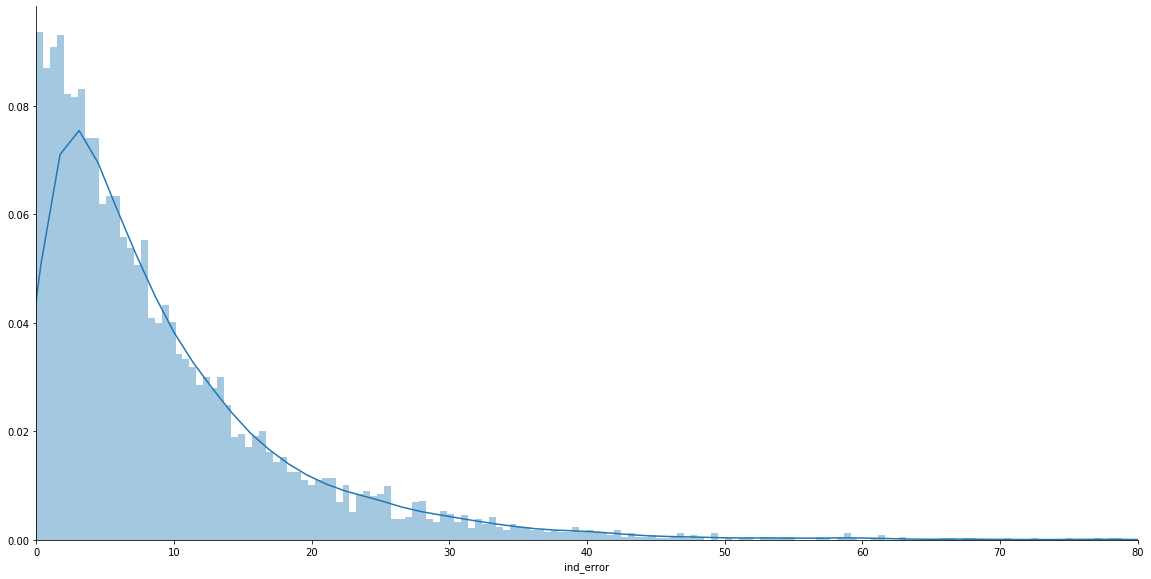

In [20]:
g = sns.FacetGrid(with_result, height=8, aspect=2, xlim=(0,80), margin_titles=True, despine=True)
#g.map(sns.distplot, "ind_error", hist_kws={'alpha':0.8}).add_legend()
sns.distplot(with_result.ind_error, bins=250, kde=True)

In [21]:
with_result["capped_num_runs"] = np.clip(with_result.num_runs, 1, shared.num_pace_years + 1)


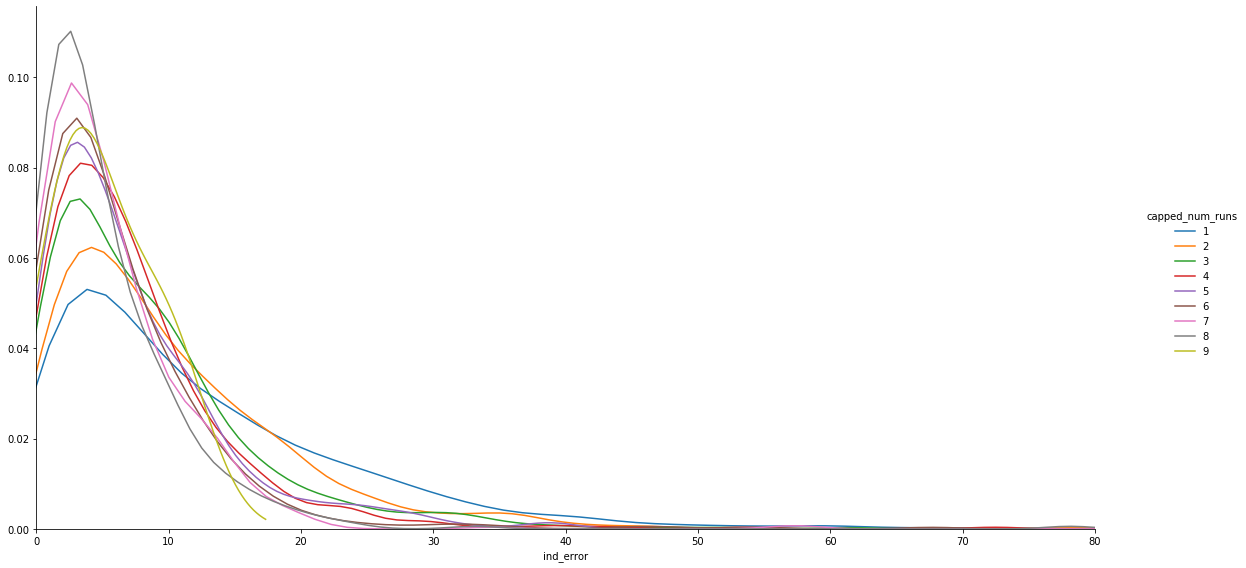

In [22]:
g = sns.FacetGrid(with_result, hue="capped_num_runs", height=8, aspect=2, xlim=(0,80), margin_titles=True, despine=True)
g.map(sns.distplot, "ind_error", hist=False, hist_kws={'alpha':0.8}).add_legend()

In [23]:
def calculate_relay_values(result_row):
    rows_so_far = with_result[(with_result.team_id == result_row.team_id) & (with_result["leg"] <= result_row["leg"])]

    return pd.Series({"real_relay_time": np.sum(rows_so_far["leg-time"]), "mean_num_runs": np.mean(rows_so_far["num_runs"]).round(0)})

relay_values = with_result.apply(lambda row: calculate_relay_values(row), axis=1)

with_result["real_relay_time"] = relay_values["real_relay_time"]
with_result["mean_num_runs"] = relay_values["mean_num_runs"]
with_result.head(10)


,team_id,leg,team,name,num_runs,ind_log_mean,ind_log_std,personal_start95,personal_median,personal_end95,...,dark_during_leg,leg-time,leg_distance,ind_leg_time_estimate,ind_error,ind_error_ratio,ind_interval_error,capped_num_runs,real_relay_time,mean_num_runs
0,1,1,Stora Tuna OK 1,Tilda Östberg,1,1.8857,0.116689,31.362034,39.411989,49.818220,...,0,47.416667,6.0,39.545799,7.870868,0.165994,False,1,47.416667,1.0
1,1,2,Stora Tuna OK 1,Magdalena Olsson,7,1.9587,0.082400,34.335339,40.474712,47.549226,...,0,37.050000,5.7,40.413592,3.363592,0.090785,False,7,84.466667,4.0
2,1,3,Stora Tuna OK 1,Julia Jakob,1,1.7824,0.141808,32.740572,43.408851,56.843543,...,0,44.116667,7.3,43.391968,0.724699,0.016427,False,1,128.583333,3.0
3,1,4,Stora Tuna OK 1,Tove Alexandersson,7,1.7963,0.067659,41.667187,47.623576,54.381271,...,0,46.200000,7.9,47.615711,1.415711,0.030643,False,7,174.783333,4.0
4,2,1,Göteborg Majorna OK 1,Amanda Hansson,2,2.0053,0.086131,37.518297,44.572995,52.816954,...,0,40.483333,6.0,44.569932,4.086599,0.100945,False,2,40.483333,2.0
5,2,2,Göteborg Majorna OK 1,Runa Fremstad,5,2.0081,0.087900,35.833819,42.571131,50.385737,...,0,36.183333,5.7,42.460158,6.276825,0.173473,False,5,76.666667,4.0
6,2,3,Göteborg Majorna OK 1,Kristine Berglia,5,1.9581,0.067659,45.168913,51.649722,58.967162,...,0,52.050000,7.3,51.726713,0.323287,0.006211,False,5,128.716667,4.0
7,2,4,Göteborg Majorna OK 1,Lisa Holer,3,1.9854,0.093119,47.843606,57.552342,68.947799,...,0,55.633333,7.9,57.527481,1.894147,0.034047,False,3,184.350000,4.0
8,3,1,MS Parma 1,Anastasia Rudnaya,4,1.8899,0.067659,34.805132,39.719039,45.365477,...,0,38.816667,6.0,39.712241,0.895574,0.023072,False,4,38.816667,4.0
9,3,2,MS Parma 1,Anni Heikkonen,7,1.9409,0.100600,32.512135,39.740944,48.522304,...,0,35.883333,5.7,39.700595,3.817262,0.106380,False,7,74.700000,6.0


In [24]:
with_result["relay_error"] = np.abs(np.exp(with_result["fin_sum_log_mean"]) - with_result["real_relay_time"])
with_result["relay_error_ratio"] = with_result["relay_error"] / with_result["real_relay_time"]

In [25]:
display(np.mean(with_result["relay_error"]))
display(np.mean(with_result["relay_error_ratio"]))

16.766839619104044

0.09567415568508132

In [26]:
display(f'Viestiennusteen keskivirhe: {np.mean(with_result["relay_error"]).round(1)} minuuttia')  
display(f'Viestiennusteen virheen mediaani: {np.median(with_result["relay_error"]).round(1)} minuuttia')  

'Viestiennusteen keskivirhe: 16.8 minuuttia'

'Viestiennusteen virheen mediaani: 10.6 minuuttia'

In [27]:
with_result[["leg", 'relay_error']].groupby('leg').agg(["mean", "median"]).round(2)

relay_error       
           mean median
leg                   
1          8.08   5.79
2         13.63   9.43
3         20.11  14.26
4         25.55  18.23

(0, 250)

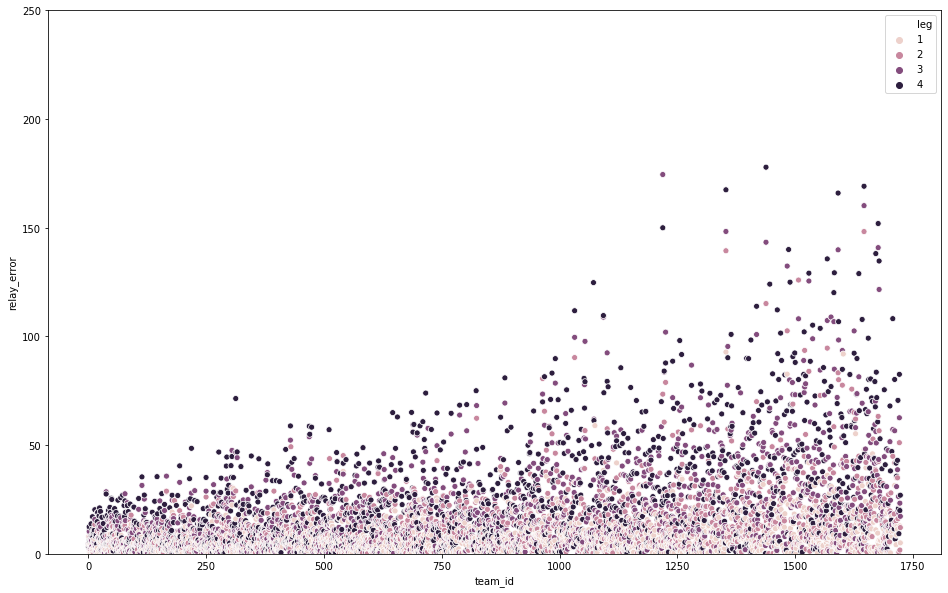

In [28]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="relay_error", hue="leg", data=with_result)
plot.axes.set_ylim(0, 250)


(0, 250)

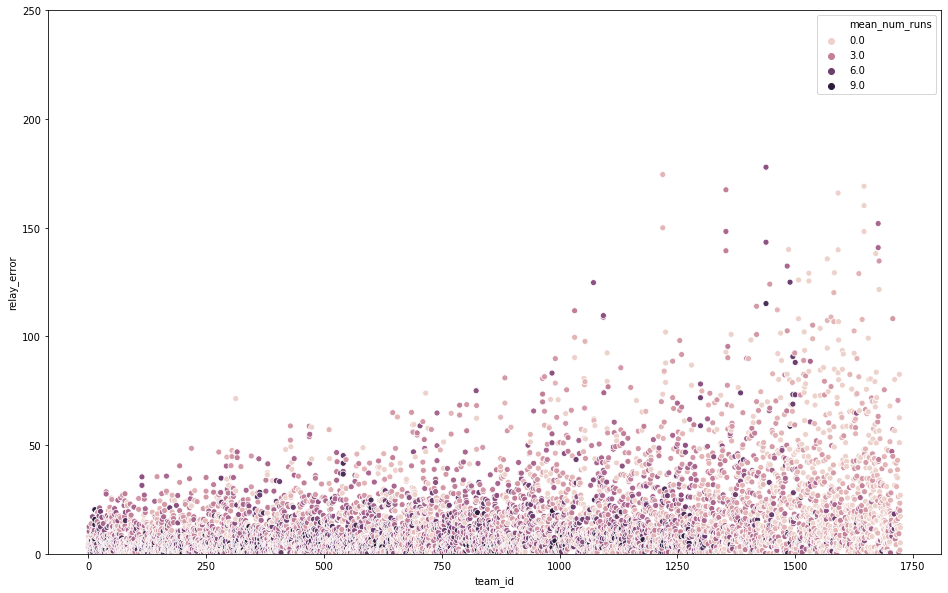

In [29]:
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="relay_error", hue="mean_num_runs", data=with_result)
plot.axes.set_ylim(0, 250)

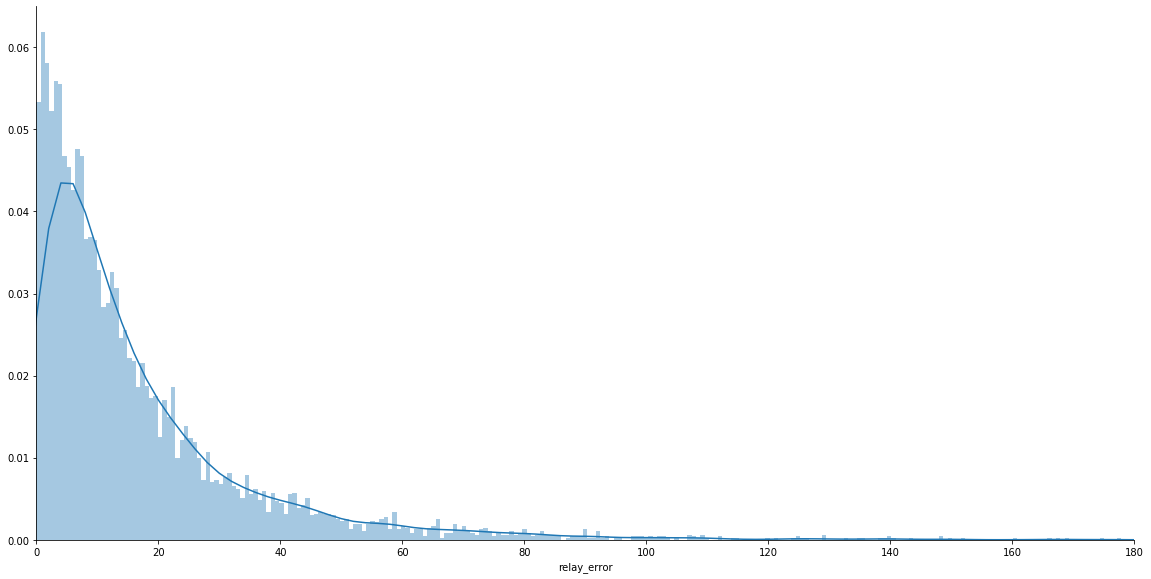

In [30]:
g = sns.FacetGrid(with_result, hue="leg", height=8, aspect=2, xlim=(0,180), margin_titles=True, despine=True)
sns.distplot(with_result.relay_error, bins=250, kde=True)

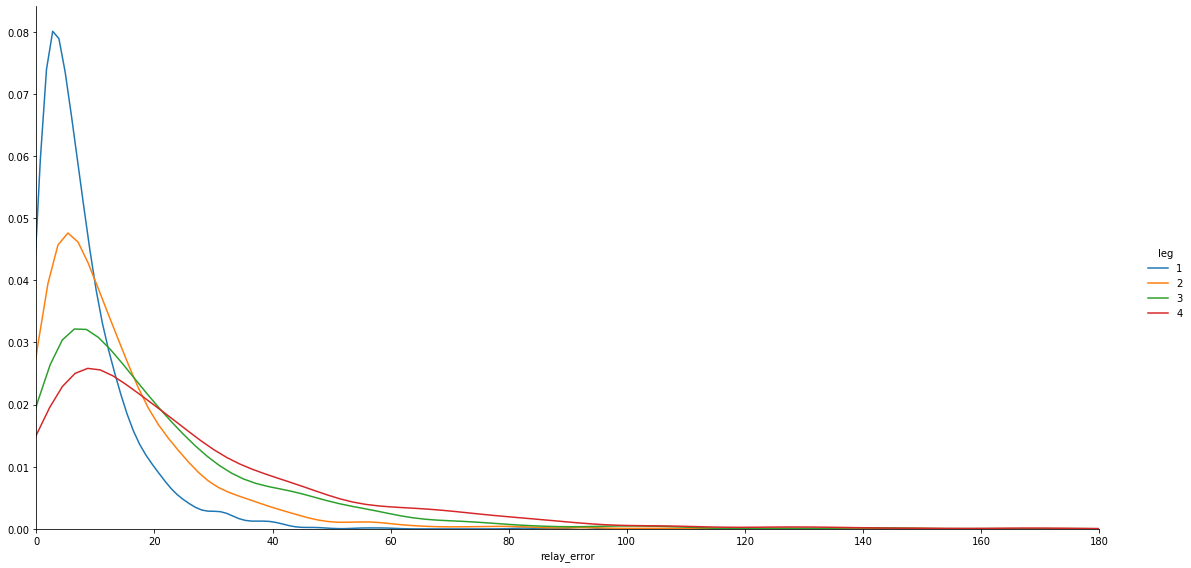

In [31]:
g = sns.FacetGrid(with_result, hue="leg", height=8, aspect=2, xlim=(0,180), margin_titles=True, despine=True)
g.map(sns.distplot, "relay_error", hist=False, hist_kws={'alpha':0.8}).add_legend()

In [32]:
with_result["real_finish_time"] = pd.to_timedelta(with_result["real_relay_time"], unit="min") + shared.start_timestamp[ve_or_ju][year]

with_result["real_interval_error"] = (with_result["real_finish_time"] < with_result["fin_time_start95"]) | (with_result["real_finish_time"] > with_result["fin_time_end95"])
with_result["real_interval_error_fast"] = (with_result["real_finish_time"] < with_result["fin_time_start95"])
with_result["real_interval_error_slow"] = (with_result["real_finish_time"] > with_result["fin_time_end95"])
np.mean(with_result["real_interval_error"])

display(f'Viestin aikaväliennuste väärin: {np.mean(with_result["real_interval_error"]).round(3) * 100} %')   

'Viestin aikaväliennuste väärin: 7.199999999999999 %'

In [33]:
display(np.mean(with_result["real_interval_error_fast"]))
display(np.mean(with_result["real_interval_error_slow"]))



0.037183184094703295

0.035210198816208835

In [34]:
with_result[["leg", 'real_interval_error', 'real_interval_error_fast', 'real_interval_error_slow']].groupby('leg').agg(["mean"]).round(3)



,real_interval_error,real_interval_error_fast,real_interval_error_slow
,mean,mean,mean
leg,,,
1,0.058,0.016,0.042
2,0.066,0.030,0.036
3,0.074,0.040,0.035
4,0.092,0.065,0.027


In [35]:
with_result[["leg", 'real_interval_error']].groupby('leg').agg(["mean"]).round(3) *100

,real_interval_error
,mean
leg,
1,5.8
2,6.6
3,7.4
4,9.2


In [36]:
with_result[["mean_num_runs", 'real_interval_error', 'real_interval_error_fast', 'real_interval_error_slow']].groupby('mean_num_runs').agg(["mean"]).round(3)

,real_interval_error,real_interval_error_fast,real_interval_error_slow
,mean,mean,mean
mean_num_runs,,,
0.0,0.124,0.060,0.064
1.0,0.065,0.035,0.030
2.0,0.071,0.052,0.019
3.0,0.059,0.037,0.023
4.0,0.059,0.030,0.028
5.0,0.070,0.026,0.044
6.0,0.057,0.010,0.047
7.0,0.043,0.011,0.032


(31.43333333333333, 452.19233333333403)

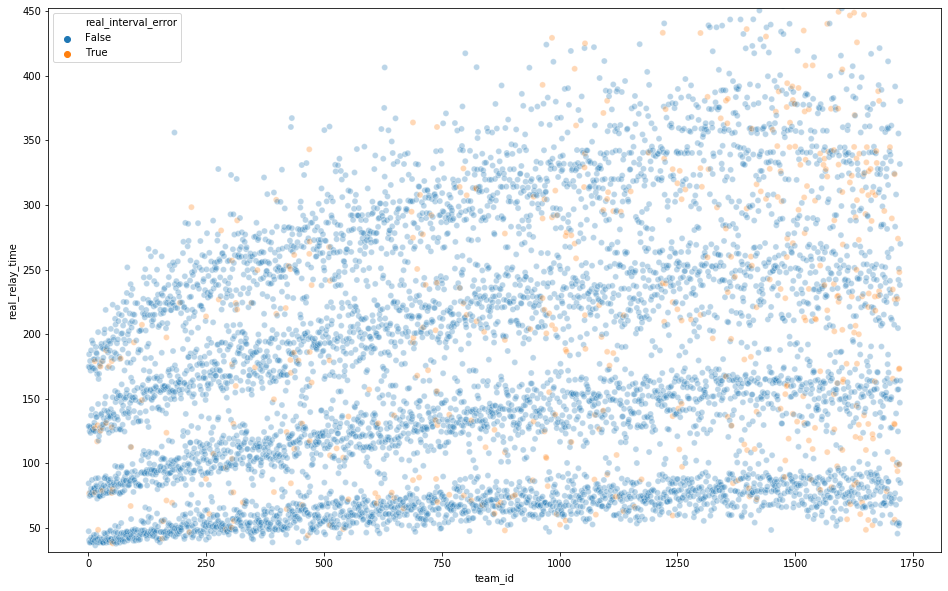

In [37]:
#out_of_interval = with_result[with_result["real_interval_error"]]
plt.figure(figsize=(16, 10))
plot = sns.scatterplot(x="team_id", y="real_relay_time", hue="real_interval_error", alpha=0.3, data=with_result)
plot.axes.set_ylim(with_result.real_relay_time.min() - 5, with_result.real_relay_time.quantile(0.995))

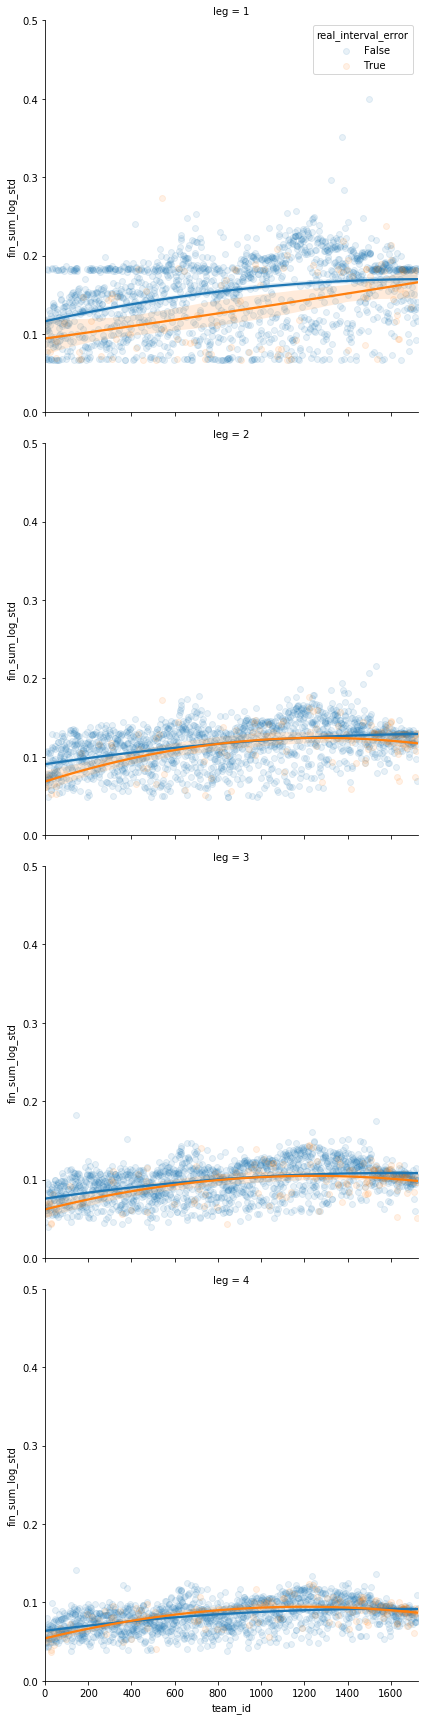

In [38]:
g = sns.FacetGrid(with_result, row="leg", hue="real_interval_error", xlim=(0,with_result.team_id.max()), ylim=(0,0.5), height=6, aspect=1, legend_out=False)
g.map(sns.regplot, "team_id", "fin_sum_log_std", scatter_kws={'alpha':0.1}, order=2).add_legend()
